<a href="https://colab.research.google.com/github/Nita-Gates/AI_AUG-DIC_2024/blob/main/Assignments/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7.- Convolutional Neural Network.**
**Mariana Salinas Dávila.
ID: 1962270**

The student will train a Convolutional Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9. The dataset is part of the Keras library.

1. Load Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

np.random.seed(123)


2. Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


3. Data preprocessing

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32')

train_images /= 255
test_images /= 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Confirm the preprocessing
print("Training images reshaped to:", train_images.shape)
print("Example one-hot encoded label:", train_labels[0])


Training images reshaped to: (60000, 28, 28, 1)
Example one-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


4. Model selection and training

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

training_history = cnn_model.fit(
    train_images, train_labels,
    epochs=8,
    batch_size=32,
    validation_split=0.1
)

# Show model summary
cnn_model.summary()


Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.8767 - loss: 0.4050 - val_accuracy: 0.9813 - val_loss: 0.0643
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9804 - loss: 0.0607 - val_accuracy: 0.9875 - val_loss: 0.0454
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9885 - val_loss: 0.0423
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9890 - val_loss: 0.0346
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9898 - val_loss: 0.0381
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9877 - val_loss: 0.0413
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9971 - loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,144 (664.63 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,430 (443.09 KB)

5. Model testing.

Test Accuracy: 99.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


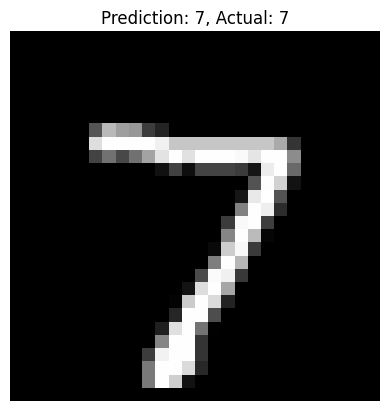

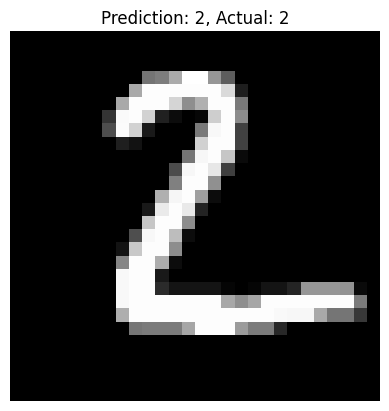

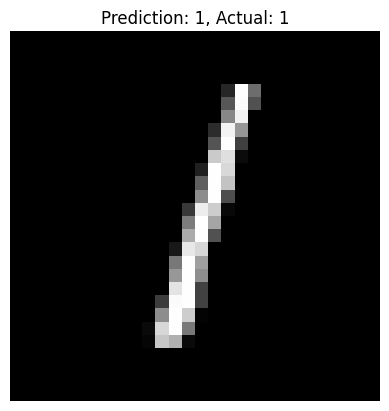

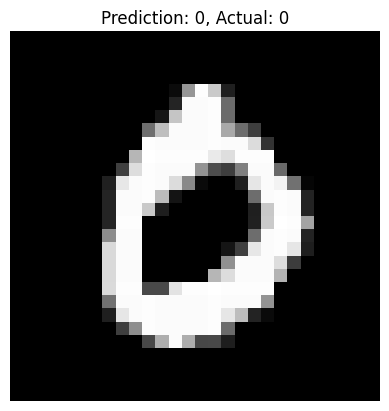

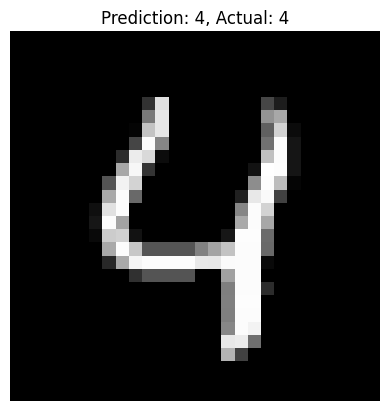

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

predicted_labels = cnn_model.predict(test_images[:5])

# Show the predictions alongside the actual labels
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predicted_labels[i])}, Actual: {np.argmax(test_labels[i])}")
    plt.axis('off')
    plt.show()


# How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?

In Assignment 7, I used 8 epochs to train the Convolutional Neural Network (CNN). This is slightly different from Assignment 6, where I trained the feedforward neural network (FNN) model with 10 epochs.

Although fewer epochs were used in Assignment 7, the CNN's structure is better suited for image data like the MNIST dataset.

# Did you get a better performance on this assignment or on assignment 6? Why?

Yes, the performance in Assignment 7 was better compared to Assignment 6.

The Convolutional Neural Network (CNN) performed better because it is specifically designed to process image data. The convolutional layers extract spatial features and patterns, such as edges and shapes, which are crucial for recognizing handwritten digits. In contrast, the feedforward neural network (FNN) in Assignment 6 doesn't have this capability and treats each pixel independently, making it less effective for image classification tasks.
